In [11]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

#Load MNIST Dataset
(x_train, y_train), (x_test, y_test)=tf.keras.datasets.mnist.load_data()

#Normalize the Dataset
x_train = x_train / 255.0
x_test = x_test / 255.0

#Build the model
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

#Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
#Train the model
history = model.fit(x_train, y_train, epochs=12, validation_split=0.1)

test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Loss: {test_loss:.4f}")
print(f"Accuracy: {test_acc:.4f}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/12
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8714 - loss: 0.4437 - val_accuracy: 0.9683 - val_loss: 0.1057
Epoch 2/12
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9659 - loss: 0.1112 - val_accuracy: 0.9723 - val_loss: 0.0975
Epoch 3/12
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9790 - loss: 0.0696 - val_accuracy: 0.9683 - val_loss: 0.0975
Epoch 4/12
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9839 - loss: 0.0528 - val_accuracy: 0.9768 - val_loss: 0.0776
Epoch 5/12
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9858 - loss: 0.0418 - val_accuracy: 0.9757 - val_loss: 0.0862
Epoch 6/12
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9893 - loss: 0.0319 - val_accuracy: 0.9775 - val_loss: 0.0895
Epoch 7/12
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9916 - loss: 0.0262 - val_accuracy: 0.9810 - val_loss: 0.0752
Epoch 8/12
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9930 - loss: 0.02

In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
import matplotlib.pyplot as plt

In [12]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=10000,
    decay_rate=0.9
)
# 1 Regularization tehnique (Dropout)
model1 = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
])

# 2 Regularization techniques (Dropout + L2 Regularization)
model2 = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [15]:
model1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

In [16]:
train1 = model1.fit(x_train, y_train, epochs=12, validation_split=0.1)
print("\n")
train2 = model2.fit(x_train, y_train, epochs=12, validation_split=0.1)

Epoch 1/12
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7824 - loss: 0.6910 - val_accuracy: 0.9637 - val_loss: 0.1259
Epoch 2/12
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9341 - loss: 0.2252 - val_accuracy: 0.9685 - val_loss: 0.0984
Epoch 3/12
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9508 - loss: 0.1667 - val_accuracy: 0.9732 - val_loss: 0.0897
Epoch 4/12
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9563 - loss: 0.1482 - val_accuracy: 0.9763 - val_loss: 0.0823
Epoch 5/12
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9609 - loss: 0.1309 - val_accuracy: 0.9767 - val_loss: 0.0761
Epoch 6/12
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9653 - loss: 0.1134 - val_accuracy: 0.9760 - val_loss: 0.0769
Epoch 7/12
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9683 - loss: 0.1037 - val_accuracy: 0.9798 - val_loss: 0.0742
Epoch 8/12
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9717 - loss: 0.0976

In [18]:
print("Model 1 Evaluation (Dropout Only):")
test_loss1, test_acc1 = model1.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss1:.6f}")
print(f"Test Accuracy: {test_acc1:.6f}")

print("\nModel 2 Evaluation (Dropout + L2):")
test_loss2, test_acc2 = model2.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss2:.4f}")
print(f"Test Accuracy: {test_acc2:.4f}")

Model 1 Evaluation (Dropout Only):
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9754 - loss: 0.0828
Test Loss: 0.070858
Test Accuracy: 0.978900

Model 2 Evaluation (Dropout + L2):
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9682 - loss: 0.2195
Test Loss: 0.2014
Test Accuracy: 0.9725


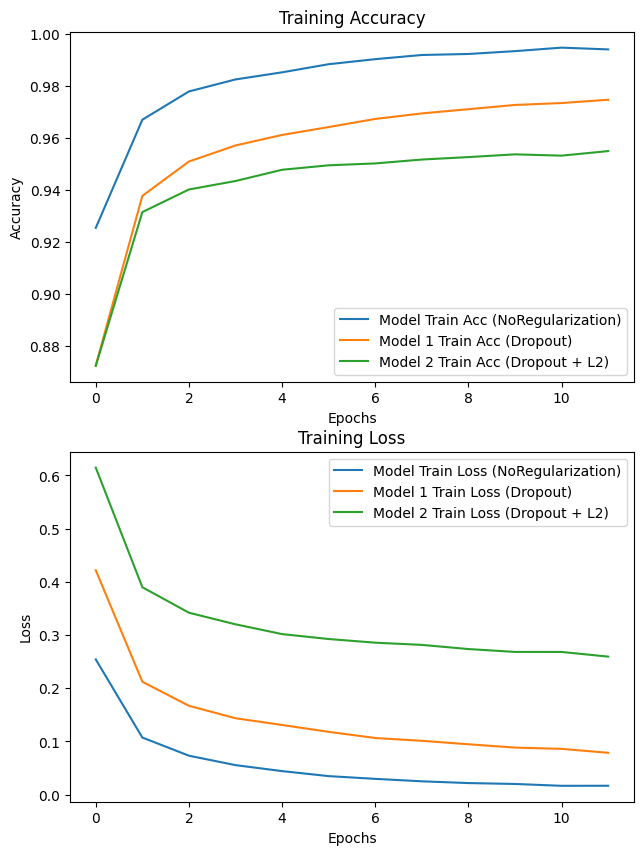

In [19]:
plt.figure(figsize=(16, 10))

# Training Accuracy
plt.subplot(2, 2, 1)
plt.plot(history.history['accuracy'], label='Model Train Acc (NoRegularization)')
plt.plot(train1.history['accuracy'], label='Model 1 Train Acc (Dropout)')
plt.plot(train2.history['accuracy'], label='Model 2 Train Acc (Dropout + L2)')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
# Training Loss
plt.subplot(2, 2, 3)
plt.plot(history.history['loss'], label='Model Train Loss (NoRegularization)')
plt.plot(train1.history['loss'], label='Model 1 Train Loss (Dropout)')
plt.plot(train2.history['loss'], label='Model 2 Train Loss (Dropout + L2)')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

Analysis

Model
No regularization techniques used.

No learning rate scheduling applied.

Performs well in the early stages but tends to overfit over time.

Without regularization or a learning rate schedule, training becomes less stable and generalization suffers.

A decent baseline, but not ideal for real-world performance.

Model 1
Uses Dropout for regularization.

Includes a Learning Rate Scheduler.

Effectively prevents overfitting and learns robustly.

Dropout randomly deactivates neurons during training, helping the model avoid relying on specific features.

The learning rate scheduler helps the model converge steadily and fine-tune over time.

Achieves the best results overall, with the highest accuracy and lowest loss.

Model 2
Combines Dropout and L2 Regularization.

Also uses a Learning Rate Scheduler.

The combination leads to underfitting, limiting the model’s learning capacity.

Ends up with the lowest accuracy and highest loss among all models.

